## Time Series Regression


In [42]:
# version 1.0
source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/myTSRegression.R")

## Dataset for exploring
Some parameters are fixed but can be explored. 
TSNormalization used is ts_gminmax(), but other normalizations are available.

In [43]:
load_series <- function(name) {
  link <- url(sprintf("https://raw.githubusercontent.com/eogasawara/mylibrary/master/data/time-series/%s.RData", name))
  x <- get(load(link))
  return(x)  
}
x <- load_series("sin")
sahead <- 1
tsize <- 1
swsize <- 10
preproc <- ts_gminmax()


## General function for testing regression methods

In [44]:
train_test <- function(x, model, sw, test_size, steps_ahead) {
  ts <- ts_data(x, sw)
  
  samp <- ts_sample(ts, test_size)

  io_train <- ts_projection(samp$train)

  model <- prepare(model, x=io_train$input, y=io_train$output)
  
  adjust <- action(model, io_train$input)
  ev_adjust <- tsregression_evaluation(io_train$output, adjust)
  print(head(ev_adjust$metrics))

  io_test <- ts_projection(samp$test)
  
  prediction <- action(model, io_test$input)
  ev_prediction <- tsregression_evaluation(io_test$output, prediction)
  print(head(ev_prediction$metrics))
  
  print(sprintf("%s %.2f", class(model)[1], 100*ev_prediction$metrics$smape))
  
  plot(model, y=c(io_train$output, io_test$output), yadj=adjust, ypre=prediction)
  
  return(model)
}


## ARIMA (baseline)

tsreg_arima,prepare.tsreg_arima,0.006,



        mse      smape
1 0.0123684 0.05188252
        mse      smape
1 0.0257263 0.08558225
[1] "tsreg_arima 8.56"


$log_time
[1] 0.006076332

$mdl
Series: x 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
         ar1    mean
      0.9807  2.0922
s.e.  0.0138  0.4076

sigma^2 estimated as 0.01262:  log likelihood=75.33
AIC=-144.65   AICc=-144.4   BIC=-136.87

$log_msg
[1] "tsreg_arima,prepare.tsreg_arima,0.006,"

attr(,"class")
[1] "tsreg_arima"   "tsregression"  "dal_transform"

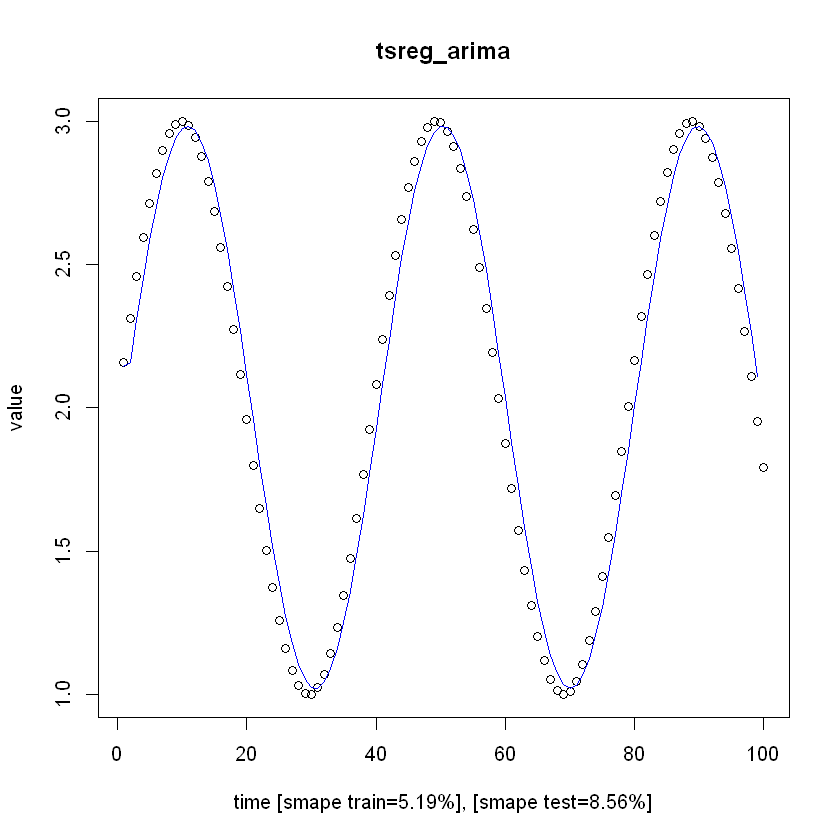

In [45]:
train_test(x, model=tsreg_arima(), 0, test_size = tsize, steps_ahead = sahead)

## Neural Networks - MLP

tsreg_mlp,prepare.tsreg_sw,0.003,



          mse      smape
1 0.002790585 0.02494837
          mse      smape
1 0.006242033 0.04309153
[1] "tsreg_mlp 4.31"


$preprocess
$gmin
[1] 1.000096

$gmax
[1] 2.999785

attr(,"class")
[1] "ts_gminmax"    "ts_normalize"  "normalize"     "dal_transform"

$input_size
[1] 4

$neurons
[1] 5

$decay
[1] 0.08

$maxit
[1] 1000

$log_time
[1] 0.002517116

$mdl
a 4-5-1 network with 31 weights
options were - linear output units  decay=0.08

$log_msg
[1] "tsreg_mlp,prepare.tsreg_sw,0.003,"

attr(,"class")
[1] "tsreg_mlp"     "tsreg_sw"      "tsregression"  "dal_transform"

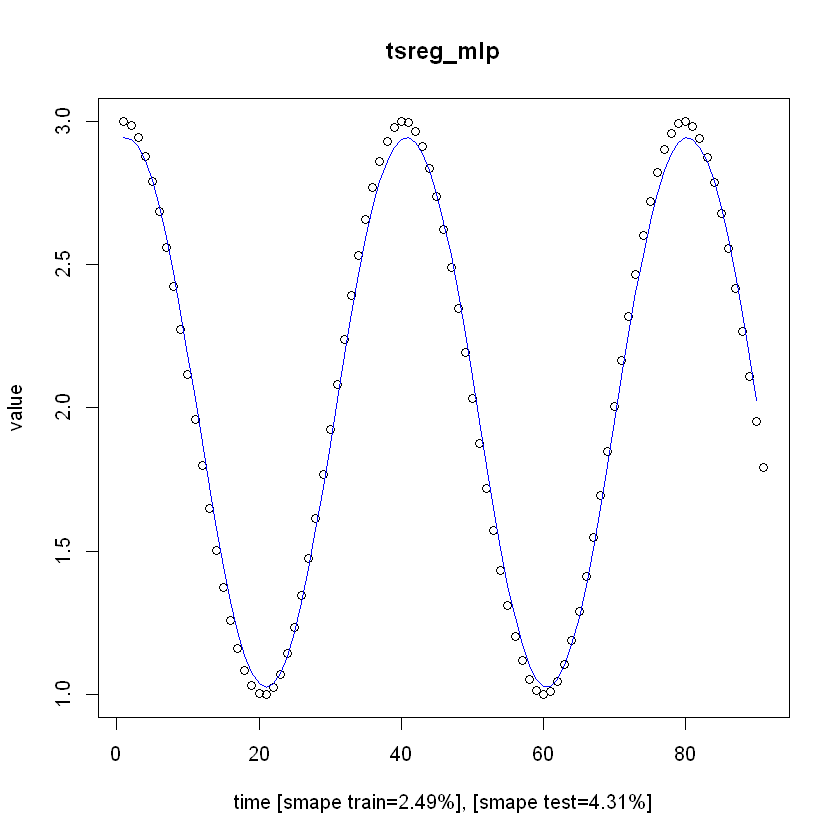

In [46]:
#do not set neurons and decay for automatic hyperparameter optimization
train_test(x, model=tsreg_mlp(preproc, input_size=4, neurons=5, decay=0.08), sw = swsize, test_size = tsize, steps_ahead = sahead)

## SVM


tsreg_svm,prepare.tsreg_sw,2.840,



           mse        smape
1 3.610375e-08 8.698386e-05
           mse       smape
1 4.785184e-08 0.000121945
[1] "tsreg_svm 0.01"


$preprocess
$gmin
[1] 1.000096

$gmax
[1] 2.999785

attr(,"class")
[1] "ts_gminmax"    "ts_normalize"  "normalize"     "dal_transform"

$input_size
[1] 4

$kernel
[1] "radial"

$epsilon
[1] 0.1

$cost
[1] 20

$log_time
[1] 2.839901

$mdl

Call:
best.tune(method = svm, train.x = x, train.y = y, ranges = list(epsilon = seq(0, 
    1, 0.1), cost = 1:100))


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  84 
      gamma:  0.25 
    epsilon:  0 


Number of Support Vectors:  87


$log_msg
[1] "tsreg_svm,prepare.tsreg_sw,2.840,"

attr(,"class")
[1] "tsreg_svm"     "tsreg_sw"      "tsregression"  "dal_transform"

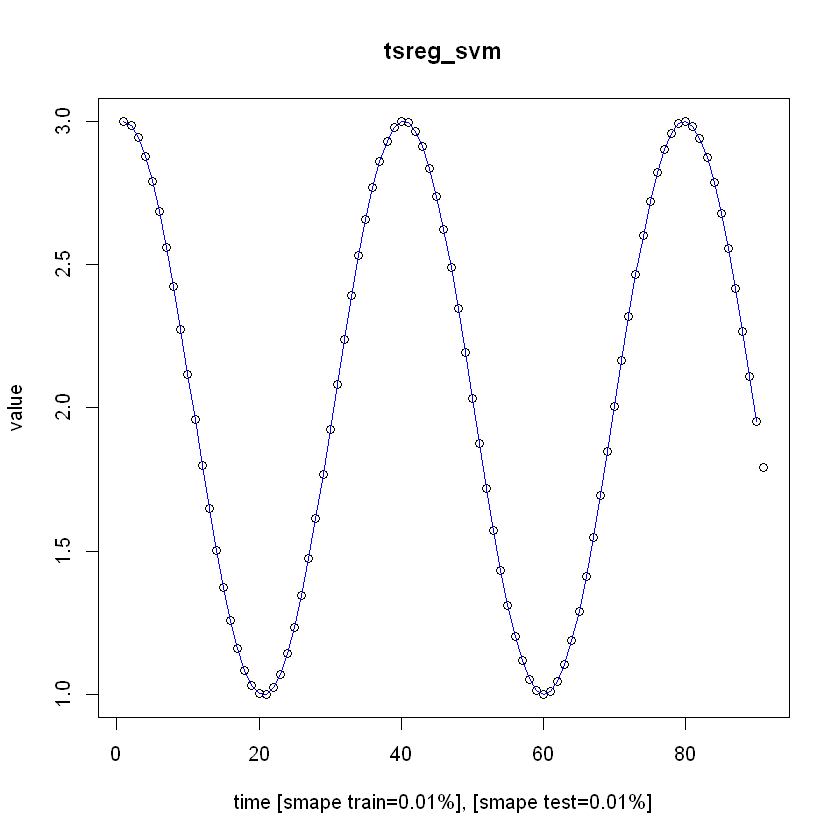

In [47]:
#do not set epsilon and cost for automatic hyperparameter optimization
train_test(x, model=tsreg_svm(preproc, input_size=4, epsilon=0.1, cost=20.000), sw = swsize, test_size = tsize, steps_ahead = sahead)

## Random Forest

Warning message in randomForest.default(structure(c(0.080194346041647, 0.51734714222878, :
"invalid mtry: reset to within valid range"
Warning message in rfout$mse/(var(y) * (n - 1)/n):
"Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
"
Warning message in randomForest.default(structure(c(0.0938237503401221, 0.829635169338222, :
"invalid mtry: reset to within valid range"
Warning message in rfout$mse/(var(y) * (n - 1)/n):
"Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
"
Warning message in randomForest.default(structure(c(0.0938237503401221, 0.829635169338222, :
"invalid mtry: reset to within valid range"
Warning message in rfout$mse/(var(y) * (n - 1)/n):
"Recycling array of length 1 in vector-array arithmetic is deprecated.
  Use c() or as.vector() instead.
"
Warning message in randomForest.default(structure(c(0.0938237503401221, 0.829635169338222, :
"invalid mtry: reset to 

          mse      smape
1 0.001975217 0.02042925
          mse      smape
1 0.004271032 0.03577794
[1] "tsreg_rf 3.58"


$preprocess
$gmin
[1] 1.000096

$gmax
[1] 2.999785

attr(,"class")
[1] "ts_gminmax"    "ts_normalize"  "normalize"     "dal_transform"

$input_size
[1] 4

$mtry
[1] 5

$ntree
[1] 375

$log_time
[1] 0.01341688

$mdl

Call:
 best.tune(method = randomForest, train.x = x, train.y = y, ranges = list(mtry = obj$mtry,      ntree = obj$ntree)) 
               Type of random forest: regression
                     Number of trees: 375
No. of variables tried at each split: 4

          Mean of squared residuals: 0.002676791
                    % Var explained: 97.83

$log_msg
[1] "tsreg_rf,prepare.tsreg_sw,0.013,"

attr(,"class")
[1] "tsreg_rf"      "tsreg_sw"      "tsregression"  "dal_transform"

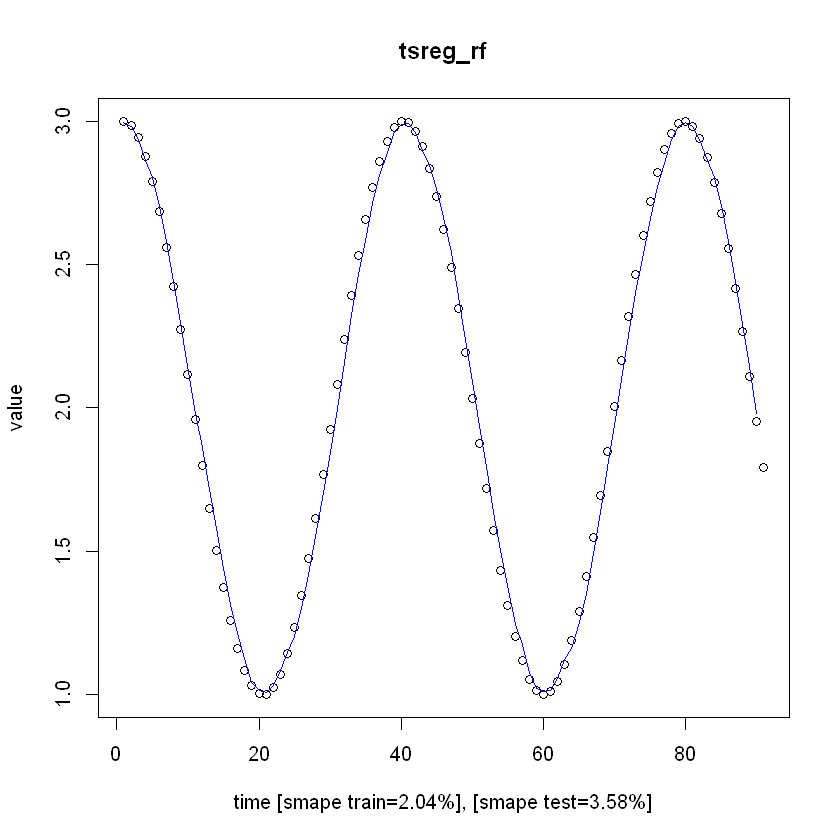

In [51]:
#do not set mtry and ntree for automatic hyperparameter optimization
train_test(x, model=tsreg_rf(preproc, input_size=4, mtry=5, ntree=375), sw = swsize, test_size = tsize, steps_ahead = sahead)

## ELM

tsreg_elm,prepare.tsreg_sw,0.000,



           mse       smape
1 4.614911e-05 0.003869529
           mse       smape
1 1.622629e-05 0.002247946
[1] "tsreg_elm 0.22"


$preprocess
$gmin
[1] 1.000096

$gmax
[1] 2.999785

attr(,"class")
[1] "ts_gminmax"    "ts_normalize"  "normalize"     "dal_transform"

$input_size
[1] 4

$nhid
[1] 1 2

$log_time
[1] 0.0003274163

$mdl
$mdl$inpweight
          [,1]      [,2]      [,3]      [,4]
[1,] 0.2655087 0.5728534 0.2016819 0.9446753
[2,] 0.3721239 0.9082078 0.8983897 0.6607978

$mdl$biashid
     [,1]

$mdl$outweight
          [,1]
[1,]  4.348511
[2,] -2.688824

$mdl$actfun
[1] "purelin"

$mdl$nhid
[1] 2

$mdl$predictions
               [,1]
 [1,]  1.0017136167
 [2,]  0.9938474323
 [3,]  0.9734435251
 [4,]  0.9410176420
 [5,]  0.8973894081
 [6,]  0.8436616085
 [7,]  0.7811923140
 [8,]  0.7115605530
 [9,]  0.6365263986
[10,]  0.5579864796
[11,]  0.4779260395
[12,]  0.3983687558
[13,]  0.3213255878
[14,]  0.2487439459
[15,]  0.1824584669
[16,]  0.1241446404
[17,]  0.0752764576
[18,]  0.0370891533
[19,]  0.0105479831
[20,] -0.0036761752
[21,] -0.0052237793
[22,]  0.0059442893
[23,]  0.0295457367
[24,]  0.0649839922


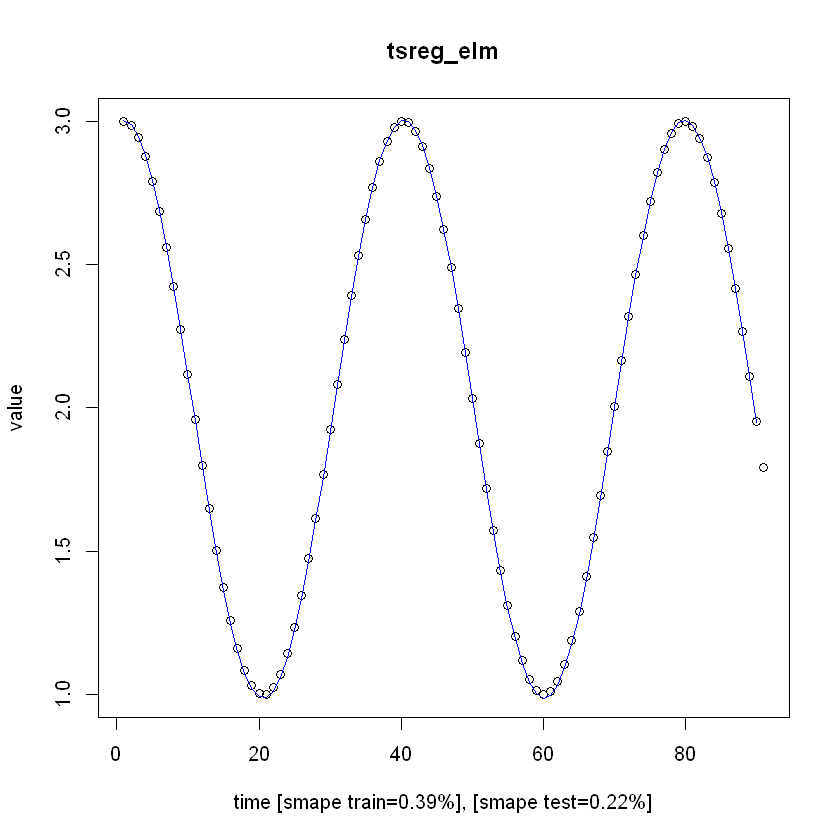

In [49]:
train_test(x, model=tsreg_elm(preproc, input_size=4), sw = swsize, test_size = tsize, steps_ahead = sahead)